# Grocery Sale Data Exploration

As everyone is experiencing the hike of grocery prices around the country. I am interested building a dashboard to show the trends of spending and compare among regions, gender, goods categories and more. The purpose of the exploration is to see what trends emerge from the data with different filters.

In this demonstration, I am adopting Bobby's Ipywidgets Dashboard with my own charts and graphs to show the sales of the first 2 weeks of November in 2016.

In [1]:
# Data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kzmontage/sales-from-different-stores")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hdang\.cache\kagglehub\datasets\kzmontage\sales-from-different-stores\versions\2


In [2]:
import pandas as pd

df = pd.read_csv(path+'/Different_stores_data_V2.csv')
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,total_profit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,375.100,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,540.153,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,5.020,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,500.425,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,60.600,Cash,South,Florida,Kanyon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   total_profit            99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [4]:
# Clean Data
def clean_grocery_df(df):
    df = df.drop(['invoice_no'], axis = 1)
    df = df.dropna()
    return df

def transform_grocery_df(df):
    # Extract Month and Year out of invoice date
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])
    df = df[df['invoice_date'].dt.month == 11]
    df['invoice_date'] = df['invoice_date'].dt.to_period('D')
    df['year'] = df['invoice_date'].dt.year
    
    # Binning the age group
    bins = [0, 12, 19, 30, 40, 50, 60, 150]
    labels = ['0-12', '12-19', '20-30','31-40','41-50','51-60', '61+']
    df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels)
    
    # Calculate Revenue
    df['revenue'] = df['quantity'] * df['selling_price_per_unit']
    return df

In [5]:
df = transform_grocery_df(df)

C:\Users\hdang\AppData\Local\Temp\ipykernel_7464\1621311544.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_date'] = df['invoice_date'].dt.to_period('D')
C:\Users\hdang\AppData\Local\Temp\ipykernel_7464\1621311544.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['invoice_date'].dt.year
C:\Users\hdang\AppData\Local\Temp\ipykernel_7464\1621311544.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

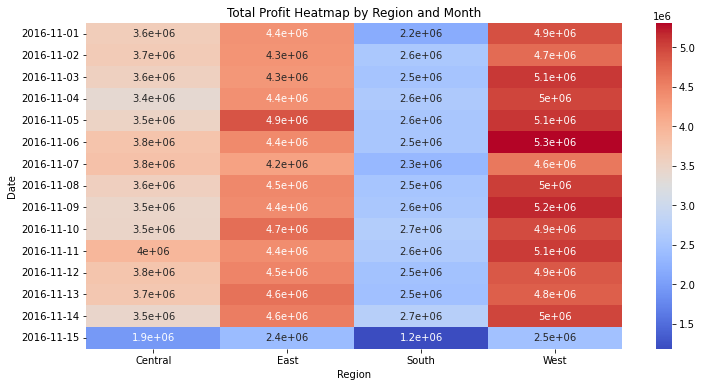

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using pivot_table() for aggregation
pivot_table_df = df.pivot_table(index='invoice_date', columns='region', values='revenue', aggfunc=np.sum)


# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_df, annot=True, cmap="coolwarm")

# Add labels
plt.xlabel("Region")
plt.ylabel("Date")
plt.title("Total Profit Heatmap by Region and Month")

# Show plot
plt.show()


Let's test our histogram function:


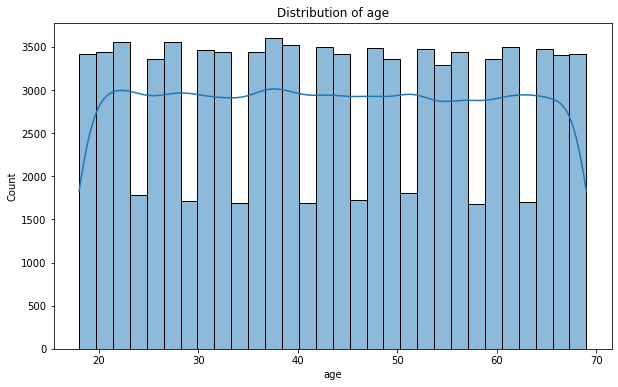

In [11]:
def create_histogram(data, column, bins=30, kde=True, title=None):
    """
    Creates a histogram with optional KDE plot.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    column : str
        Column name to plot
    bins : int
        Number of bins for histogram
    kde : bool
        Whether to include KDE plot
    title : str
        Plot title (optional)
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=kde, bins=bins)
    plt.title(title or f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

print("Let's test our histogram function:")
create_histogram(df, 'age')
plt.show()

In [24]:
t = df['revenue'].groupby(df['region']).sum()
t.index.to_list()


['Central', 'East', 'South', 'West']


Testing scatter plot with color grouping:


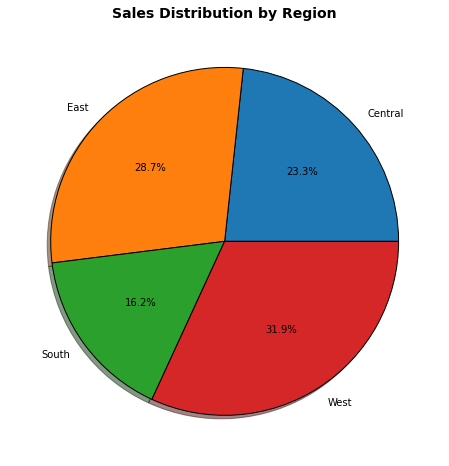

In [27]:
def create_pie(data, category, value, hue_col=None, title=None):
    """
    Creates a scatter plot with optional color grouping.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    category : str
        Name of category column
    value : str
        Column name for y-axis
    hue_col : str
        Column name for color grouping (optional)
    title : str
        Plot title (optional)
    """
    # Aggregation
    summary = data[value].groupby(data[category]).sum()
    

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        summary, labels=summary.index.to_list(), autopct="%1.1f%%", 
         shadow=True, startangle=0, wedgeprops={'edgecolor': 'black'}
    )

    # Add title
    plt.title("Sales Distribution by Region", fontsize=14, fontweight="bold")

    # Show plot
    plt.show()

print("\nTesting scatter plot with color grouping:")
create_pie(df, 'region','revenue')
plt.show()


Testing box plot:


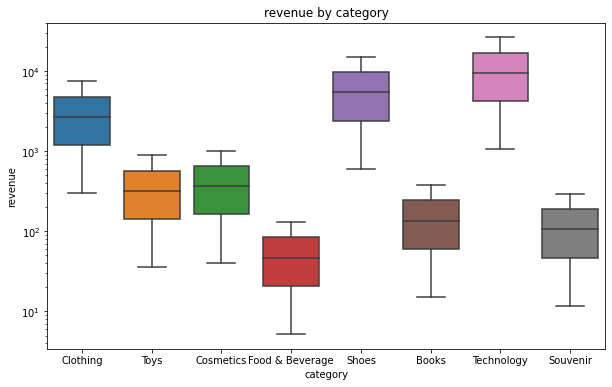

In [16]:
def create_boxplot(data, x_col, y_col, title=None):
    """
    Creates a box plot for comparing distributions.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    x_col : str
        Column name for grouping
    y_col : str
        Column name for values
    title : str
        Plot title (optional)
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.yscale("log")
    plt.title(title or f'{y_col} by {x_col}')

print("\nTesting box plot:")
create_boxplot(df, 'category', 'revenue')
plt.show()


Testing line plot:


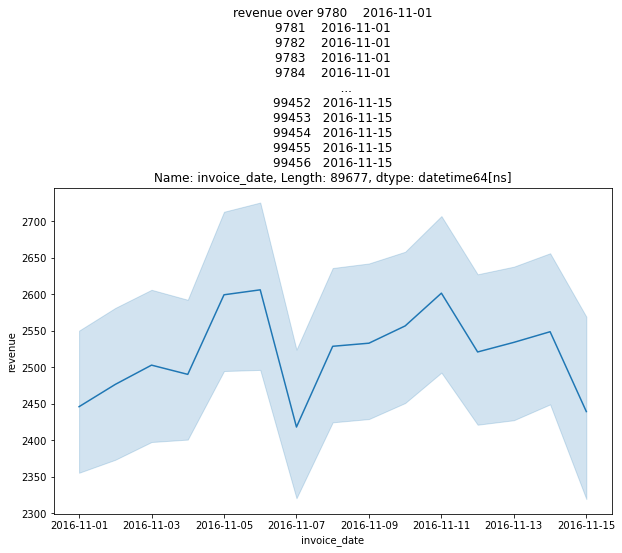

In [10]:
def create_lineplot(data, x_col, y_col, title=None):
    """
    Creates a line plot with confidence interval.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    x_col : str
        Column name for x-axis
    y_col : str
        Column name for y-axis
    title : str
        Plot title (optional)
    """
    x_col = df['invoice_date'].dt.to_timestamp()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=x_col, y=y_col)
    plt.title(title or f'{y_col} over {x_col}')

print("\nTesting line plot:")
create_lineplot(df, 'invoice_date', 'revenue')
plt.show()

# Dashboard

In [ ]:
def create_dashboard(data, hist_col='mpg', scatter_x='weight', scatter_y='mpg',
                    box_x='origin', box_y='mpg', line_x='model_year', line_y='mpg'):
    """
    Creates a dashboard combining all our plot types.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    hist_col : str
        Column for histogram
    scatter_x, scatter_y : str
        Columns for scatter plot
    box_x, box_y : str
        Columns for box plot
    line_x, line_y : str
        Columns for line plot
    """
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=data, x=hist_col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {hist_col}')

    # Scatter plot
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=data, x=scatter_x, y=scatter_y, hue='origin', ax=ax2)
    ax2.set_title(f'{scatter_y} vs {scatter_x}')

    # Box plot
    ax3 = fig.add_subplot(gs[1, 0])
    sns.boxplot(data=data, x=box_x, y=box_y, ax=ax3)
    ax3.set_title(f'{box_y} by {box_x}')

    # Line plot
    ax4 = fig.add_subplot(gs[1, 1])
    sns.lineplot(data=data, x=line_x, y=line_y, ax=ax4)
    ax4.set_title(f'{line_y} over {line_x}')

    plt.tight_layout()
    return fig

print("\nTesting our dashboard:")
create_dashboard(df)
plt.show()

In [ ]:
def create_interactive_dashboard():
    """Creates an interactive dashboard with widgets for controlling the display."""

    # First, let's explore widget creation and understand the syntax

    # Get numeric and categorical columns for our dropdown options
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

    # Create a dropdown widget
    # - options: list of possible choices
    # - value: default/initial selection
    # - description: label shown next to widget
    # - style: dictionary of CSS-like styling options
    hist_dropdown = Dropdown(
        options=numeric_cols,        # List of numeric columns
        value='mpg',                 # Default selection
        description='Histogram:',     # Widget label
        style={'description_width': 'initial'}  # Make label width dynamic
    )

    scatter_x = Dropdown(
        options=numeric_cols,
        value='weight',
        description='Scatter X:',
        style={'description_width': 'initial'}
    )

    scatter_y = Dropdown(
        options=numeric_cols,
        value='mpg',
        description='Scatter Y:',
        style={'description_width': 'initial'}
    )

    # Create a range slider for year selection
    # IntRangeSlider provides two handles for selecting a range
    year_range = IntRangeSlider(
        value=[70, 82],             # Default range
        min=70,                     # Minimum value
        max=82,                     # Maximum value
        step=1,                     # Step size
        description='Years:',        # Widget label
        continuous_update=False,     # Only update when user releases slider
        style={'description_width': 'initial'}
    )

    # The update function that will be called whenever a widget value changes
    # This function must accept parameters matching the widget names we'll use with @interact
    def update(hist_col, scatter_x_col, scatter_y_col, year_range):
        """
        Update function for our interactive dashboard.

        Parameters match the widget names we use with @interact below.
        Each parameter will receive the current value of its corresponding widget:
        - hist_col: string from hist_dropdown
        - scatter_x_col: string from scatter_x dropdown
        - scatter_y_col: string from scatter_y dropdown
        - year_range: tuple of (min, max) from year_range slider
        """
        # Filter data by year range
        # year_range is a tuple of (min, max) from the IntRangeSlider
        filtered_df = df[
            (df['model_year'] >= year_range[0]) &
            (df['model_year'] <= year_range[1])
        ]

        # Clear previous output to avoid memory issues
        clear_output(wait=True)

        # Create and display the dashboard with current widget values
        fig = create_dashboard(
            filtered_df,
            hist_col=hist_col,          # Current histogram column selection
            scatter_x=scatter_x_col,     # Current scatter x-axis selection
            scatter_y=scatter_y_col      # Current scatter y-axis selection
        )
        plt.show()

    # Connect widgets to the update function using interact

    # Method 1: Pass widget instances directly
    # - Each parameter name must match the function parameter names
    # - The widget instances we created above are passed as values
    interact(
        update,                    # Function to call when widgets change
        hist_col=hist_dropdown,    # Maps hist_col parameter to hist_dropdown widget
        scatter_x_col=scatter_x,   # Maps scatter_x_col parameter to scatter_x widget
        scatter_y_col=scatter_y,   # Maps scatter_y_col parameter to scatter_y widget
        year_range=year_range      # Maps year_range parameter to year_range widget
    )
    
# Create and display our interactive dashboard
create_interactive_dashboard()

## Next Steps